# DIANA SOFIA BOLANOS RENGIFO


## Regresión Logística
Dataset – Titanic dataset
### https://www.kaggle.com/datasets/yasserh/titanic-dataset

Set de datos sobre los pasajeros del Titanic. Permite practia  
modelos de clasificación y regresión para predecir quién sobrivo  ó
al naugio.fra

Seleccionar uno de los modelos de Aprendizaje Supervisado vistos
en la Tarea 3 (Regresión Lineal, Regresión Logística o Árboles de
decisión) y realizar los siguientes p
aso
s:
1. Realizar un análisis exploratorio de los datos para identificar
relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y
transformándolos según sea necesario.
3. Seleccionar las características más relevantes para entrenar el
modelo utilizando selección de características.
4. Dividir el dataset en Train y Test para evaluar correctamente el
modelo.
5. Entrenar el modelo configurando los diferentes
hiperparámetros.
6. Evaluar el desempeño del modelo en el conjunto de Test con
métricas como precisión, recall, F1-score, etc.
7. Realizar las diferentes gráficas que permitan visualizar los
resultados del modelo.
8. Interpretar, analizar y documentar los resuados obtenidosgio.s.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                      

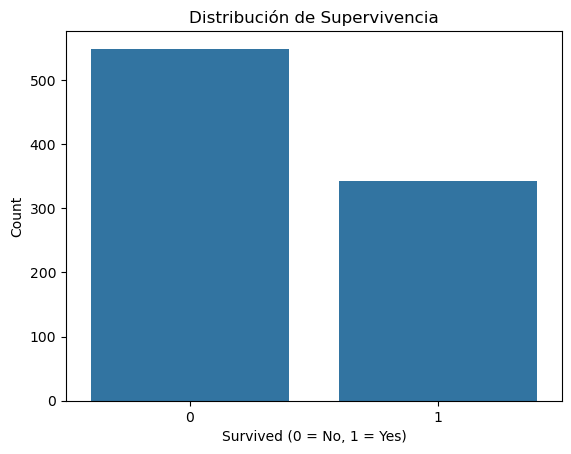

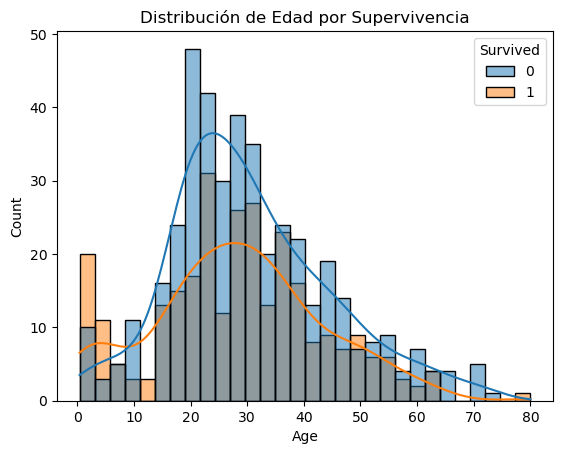

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Características seleccionadas: ['Pclass', 'Sex', 'Parch', 'Fare', 'Embarked']
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       105
           1       0.72      0.74      0.73        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



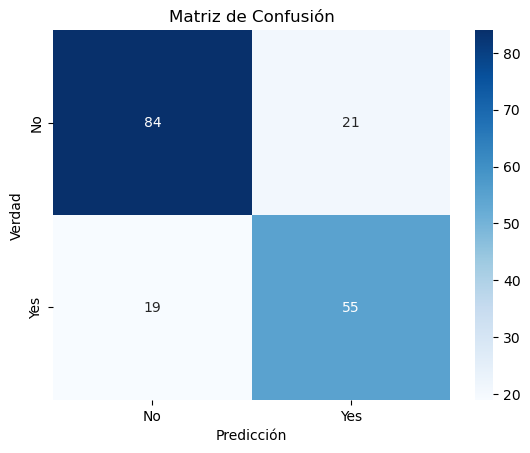

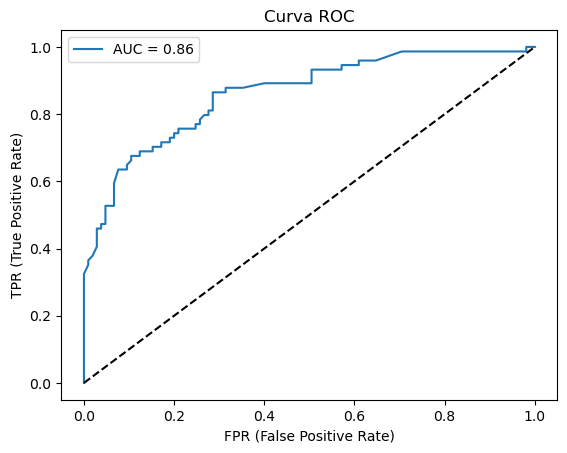

Exactitud del modelo: 0.78


In [6]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler

# PASO 1: Cargar el dataset
data = pd.read_csv("Titanic-Dataset.csv")

# Información básica del dataset
print(data.info())
print(data.head())

# PASO 2: Análisis exploratorio
sns.countplot(x='Survived', data=data)
plt.title('Distribución de Supervivencia')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

sns.histplot(data=data, x='Age', hue='Survived', kde=True, bins=30)
plt.title('Distribución de Edad por Supervivencia')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

print(data.isnull().sum())

# PASO 3: Preprocesamiento
# Rellenar valores faltantes en 'Age' con la mediana
data['Age'] = data['Age'].fillna(data['Age'].median())

# Rellenar valores faltantes en 'Embarked' con la moda
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

# Eliminar columnas irrelevantes
data = data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

# Convertir variables categóricas a numéricas
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# PASO 4: Selección de características
selected_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = data[selected_features]
y = data['Survived']

# Normalizar datos numéricos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Seleccionar las mejores características con ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X_scaled, y)
selected_columns = [selected_features[i] for i in selector.get_support(indices=True)]
print("Características seleccionadas:", selected_columns)

# PASO 5: División de datos
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# PASO 6: Entrenar el modelo
model = LogisticRegression()
model.fit(X_train, y_train)

# PASO 7: Evaluar el modelo
y_pred = model.predict(X_test)

print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Verdad')
plt.show()

y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Curva ROC')
plt.xlabel('FPR (False Positive Rate)')
plt.ylabel('TPR (True Positive Rate)')
plt.legend()
plt.show()

accuracy = model.score(X_test, y_test)
print(f"Exactitud del modelo: {accuracy:.2f}")
